In [404]:
from frame_semantic_transformer import FrameSemanticTransformer
import pickle
import logging
import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

logger = logging.getLogger()

In [405]:
nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

### Lexicons for Action Verbs and Physical Consequences associated with War & Conflict

In [412]:
with open('../../data/lexicons/custom-lexicon-physical-consequences-war.txt', 'rb') as f:
    consequences_lexicon = f.read().decode('utf-8').split('\n')
    consequences_lexicon = [x.lower() for x in consequences_lexicon]

with open('../../data/lexicons/custom-lexicon-action-verbs.txt', 'rb') as f:
    action_verbs_lexicon = f.read().decode('utf-8').split('\n')
    action_verbs_lexicon = [x.lower() for x in action_verbs_lexicon]

with open('../../data/lexicons/visible_effects.txt', 'rb') as f:
    visible_effects = f.read().decode('utf-8').split('\n')
    visible_effects = [x.lower() for x in visible_effects]

with open('../../data/lexicons/framenet_visible_effects.txt', 'rb') as f:
    framenet_frames = f.read().decode('utf-8').split('\n')
    framenet_frames = [x.lower() for x in framenet_frames]

with open('../../data/lexicons/framenet_invisible_effects.txt', 'rb') as f:
    invisble_effects = f.read().decode('utf-8').split('\n')
    invisble_effects = [x.lower() for x in invisble_effects]

In [407]:
"quantified_mass" in framenet_frames

True

### Filtered dataset for US, UK, Middle East

In [408]:
def read_file(filename: str):
    data = pd.read_csv(filename)
    return data 

UK = read_file('../../data/raw/selected_data/selected_UK.csv')
ME = read_file('../../data/raw/selected_data/selected_MiddleEast.csv')
US = read_file('../../data/raw/selected_data/selected_US.csv')

print(UK.shape)
print(ME.shape)
print(US.shape)

(8150, 10)
(4145, 10)
(9629, 10)


### NER on selected Docs

In [409]:
def read_pickle_file(filename: str):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
        return data

UK_headline_ner = read_pickle_file('../../data/processed/ner/ner_UK_main.pickle')
ME_headline_ner = read_pickle_file('../../data/processed/ner/ner_MiddleEast_main.pickle')
US_headline_ner = read_pickle_file('../../data/processed/ner/ner_US_main.pickle')

UK_maintext_ner = read_pickle_file('../../data/processed/ner/ner_UK_headline.pickle')
ME_maintext_ner = read_pickle_file('../../data/processed/ner/ner_MiddleEast_headline.pickle')
US_maintext_ner = read_pickle_file('../../data/processed/ner/ner_US_headline.pickle')

UK_preprocessed = read_pickle_file('../../data/processed/preprocessed/processed_documents_UK.pkl')
ME_preprocessed = read_pickle_file('../../data/processed/preprocessed/processed_documents_ME.pkl')
US_preprocessed = read_pickle_file('../../data/processed/preprocessed/processed_documents_US.pkl')

print(list(UK_headline_ner.keys()))
print(len(UK_headline_ner['index']), len(UK_headline_ner['ner_output']))
print(len(ME_headline_ner['index']), len(ME_headline_ner['ner_output']))
print(len(US_headline_ner['index']), len(US_headline_ner['ner_output']))

print(len(UK_maintext_ner['index']), len(UK_maintext_ner['ner_output']))
print(len(ME_maintext_ner['index']), len(ME_maintext_ner['ner_output']))
print(len(US_maintext_ner['index']), len(US_maintext_ner['ner_output']))


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f80d04d3d00>>
Traceback (most recent call last):
  File "/Users/avtk/miniconda3/envs/riveterEnv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


['index', 'ner_output']
0 9092
0 6307
0 9895
18183 9092
12613 6307
19789 9895


In [ ]:
import string
from collections import Counter
from collections import defaultdict
from spacy.tokens import Doc
from collections import Counter
from typing import List, Dict, Set

def preprocess_lexicon(lexicon):

    doc = nlp(" ".join(lexicon)) 

    # Perform lemmatization and remove stopwords and punctuation
    lemmas = [token.lemma_.lower() for token in doc
              if not token.is_stop and not token.is_punct]

    return lemmas

def count_lexicon_words(doc: spacy.tokens.doc.Doc, lexicon: Set[str]) -> Dict[str, int]:
    """
    Count occurrences of lexicon words in a spaCy Doc object.
    
    Args:
    doc (spacy.tokens.doc.Doc): The processed document.
    lexicon (set of str): A set containing lexicon words.
    
    Returns:
    dict: A dictionary with lexicon words as keys and their counts as values.
    """
    # Filter tokens in the document to find those that are in the lexicon
    # Convert tokens to lower case for case insensitive matching
    words = [token.text.lower() for token in doc if token.text.lower() in lexicon]
    
    # Count occurrences of each word
    word_count = Counter(words)
    
    return dict(word_count)

In [ ]:
ner_outputs = [output[0] for output in UK_maintext_ner['ner_output']]

# Add the LEXICON here. 
processed_lexicon = preprocess_lexicon(visible_effects)

all_counts = [count_lexicon_words(article, set(processed_lexicon)) for article in UK_preprocessed]
total_counts = defaultdict(int)
for article_counts in all_counts:
    for word, count in article_counts.items():
        total_counts[word] += count


In [ ]:
sorted_total_counts = dict(sorted(total_counts.items(), key=lambda item: item[1], reverse=True))
sorted_total_counts

{'attack': 11200,
 'war': 10981,
 'hostage': 7473,
 'ceasefire': 4892,
 'strike': 3663,
 'terrorist': 3560,
 'death': 3205,
 'violence': 2168,
 'soldier': 2147,
 'genocide': 2125,
 'refugee': 1277,
 'shoot': 1273,
 'assault': 1243,
 'airstrike': 1240,
 'murder': 1105,
 'victim': 1105,
 'defense': 1102,
 'bomb': 1026,
 'invasion': 959,
 'wound': 954,
 'drone': 924,
 'truce': 913,
 'battle': 902,
 'terrorism': 891,
 'massacre': 784,
 'bombing': 763,
 'kidnap': 753,
 'destruction': 745,
 'negotiation': 743,
 'casualty': 725,
 'clash': 696,
 'killing': 674,
 'injury': 671,
 'raid': 648,
 'armistice': 619,
 'occupation': 611,
 'captivity': 538,
 'beat': 536,
 'combat': 493,
 'resistance': 481,
 'collapse': 476,
 'sanction': 473,
 'rescue': 458,
 'explosion': 441,
 'evacuation': 402,
 'veteran': 379,
 'siege': 366,
 'survivor': 356,
 'slaughter': 355,
 'rebel': 349,
 'aftermath': 334,
 'shell': 311,
 'artillery': 266,
 'retaliation': 258,
 'ethnic': 245,
 'patrol': 238,
 'propaganda': 229,
 

In [ ]:
"""
def find_co_occurrences_with_counts(ner_outputs, lexicon):
    # Initialize a dictionary to hold counts of each lexicon word
    word_counts = {word: 0 for word in lexicon}
    count = 0
    doc_count = 0
    
    # Iterate through each document's NER outputs (list of lists like [word, entity_type])
    for document in ner_outputs:
        doc_count += 1
        token_list = []
        # Create a set to hold unique lexicon words found in this document
        found_lexicon_words = set()
        
        # Flags to check if any cardinal entity exists in the document
        has_cardinality = any(token[3] == "CARDINAL" for token in document if len(document)>0)
        # If a cardinal entity is present, proceed to check for lexicon words
        if has_cardinality:
            count += 1
            # Check each token and update if it's a lexicon word
            token_list.extend([token for token in document])
            print(token_list)
        
        # Update counts for each found lexicon word in this document
        for word in found_lexicon_words:
            word_counts[word] += 1
    print(count, doc_count)
    return word_counts


# Get co-occurrences
counts = find_co_occurrences_with_counts(ner_outputs, visible_effects)
print(counts)
sorted_total_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
sorted_total_counts"""

'\ndef find_co_occurrences_with_counts(ner_outputs, lexicon):\n    # Initialize a dictionary to hold counts of each lexicon word\n    word_counts = {word: 0 for word in lexicon}\n    count = 0\n    doc_count = 0\n    \n    # Iterate through each document\'s NER outputs (list of lists like [word, entity_type])\n    for document in ner_outputs:\n        doc_count += 1\n        token_list = []\n        # Create a set to hold unique lexicon words found in this document\n        found_lexicon_words = set()\n        \n        # Flags to check if any cardinal entity exists in the document\n        has_cardinality = any(token[3] == "CARDINAL" for token in document if len(document)>0)\n        # If a cardinal entity is present, proceed to check for lexicon words\n        if has_cardinality:\n            count += 1\n            # Check each token and update if it\'s a lexicon word\n            token_list.extend([token for token in document])\n            print(token_list)\n        \n        # Up

In [ ]:
import pickle
with open("../../data/processed/frame_semantics/frame_semantics_UK_main.pickle", "rb") as f: 
    UK_frame_semantics = pickle.load(f)


In [ ]:
"""Function to count frames and their counts in a list of FrameSemanticTransformer objects."""

def count_occurrences_frames(frame_semantics: list):
    """
    Count occurrences of frames in a list of FrameSemanticTransformer objects.
    
    Args:
    frame_semantics (list[FrameSemanticTransformer]): A list of FrameSemanticTransformer objects.
    
    Returns:
    dict: A dictionary with frames as keys and their counts as values.
    """
    # Initialize a dictionary to hold counts of each frame
    frame_counts = {}
    
    # Iterate through each FrameSemanticTransformer object
    for document in frame_semantics['frame_semantics']:
        for sentence in document:
            for frame in sentence.frames:
                # Get the frame name
                current_frame = frame.name.lower()
                
                # Update the count for this frame
                if current_frame in frame_counts:
                    frame_counts[current_frame] += 1
                else:
                    frame_counts[current_frame] = 1
    
    return frame_counts


In [ ]:
frame_counts = count_occurrences_frames(UK_frame_semantics)

In [ ]:
relevant = {frame for frame in frame_counts if frame in framenet_frames}
relevant_counts = {frame: frame_counts[frame] for frame in relevant}

relevant_counts

{'death': 1035,
 'surrendering': 15,
 'besieging': 92,
 'explosion': 127,
 'attack': 4374,
 'arson': 31,
 'counterattack': 4,
 'firing': 248,
 'quantified_mass': 3192,
 'buildings': 2838,
 'rebellion': 6,
 'military_operation': 19,
 'terrorism': 1047,
 'killing': 3338,
 'hostile_encounter': 4597,
 'destroying': 643,
 'subversion': 38,
 'committing_crime': 453,
 'violence': 26}

975
{'statement': 20505, 'leadership': 9137, 'calendric_unit': 6869, 'people': 6078, 'political_locales': 6065, 'hostile_encounter': 4597, 'attack': 4374, 'kinship': 4067, 'aggregate': 3745, 'increment': 3423, 'killing': 3338, 'intentionally_act': 3260, 'arriving': 3232, 'quantified_mass': 3192, 'relative_time': 2938, 'causation': 2840, 'buildings': 2838, 'request': 2551, 'existence': 2545, 'time_vector': 2483, 'telling': 2166, 'judgment_communication': 2160, 'measure_duration': 2136, 'text': 2114, 'interior_profile_relation': 2076, 'temporal_collocation': 2010, 'awareness': 1969, 'desiring': 1957, 'emotion_directed': 1931, 'cardinal_numbers': 1931, 'discussion': 1919, 'assistance': 1818, 'military': 1806, 'inclusion': 1775, 'attributed_information': 1758, 'event': 1745, 'locale_by_use': 1723, 'taking_sides': 1699, 'capability': 1673, 'age': 1673, 'locale': 1670, 'perception_experience': 1658, 'self_motion': 1637, 'attempt': 1594, 'using': 1527, 'possession': 1429, 'experiencer_focus':

/var/folders/66/7zn69qrn4cg38jdkg3kkzj_m0000gr/T/ipykernel_10560/3740376732.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_frames.values()), y=list(top_frames.keys()), palette="crest",saturation=0.8)


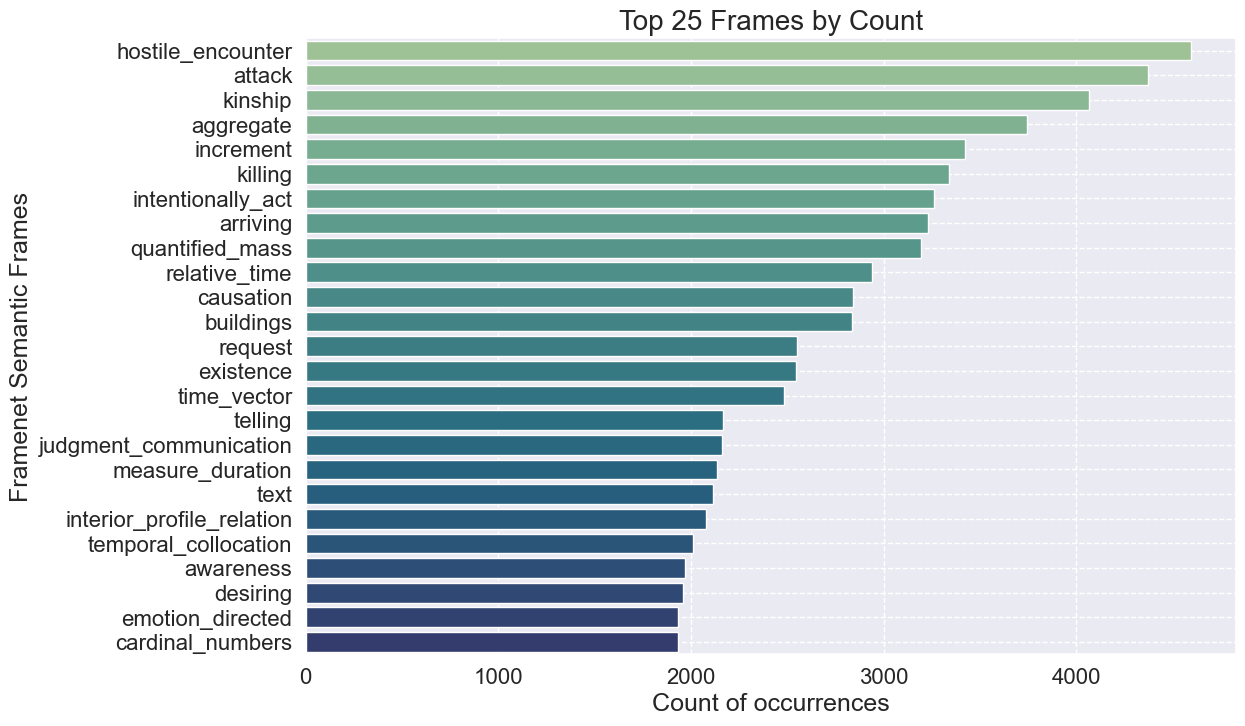

In [ ]:
frame_counts = count_occurrences_frames(UK_frame_semantics)
print(len(frame_counts))

# sort frame counts
sorted_frame_counts = dict(sorted(frame_counts.items(), key=lambda item: item[1], reverse=True)) 
print(sorted_frame_counts)

filtered_frames = {frame: count for frame, count in sorted_frame_counts.items() if count>1000 and count < 6000}

# plot semantic frames 
import matplotlib.pyplot as plt
import seaborn as sns
sns.light_palette("seagreen", as_cmap=True)

def plot_frame_counts(frame_counts: dict, top_n: int = 30):
    """
    Plot the top N frames by count.
    
    Args:
    frame_counts (dict): A dictionary with frames as keys and their counts as values.
    top_n (int): The number of top frames to plot.
    """
    # Get the top N frames
    top_frames = dict(list(frame_counts.items())[:top_n])
    
    # Create a bar plot
    plt.figure(figsize=(12, 8))
    custom_pallette = sns.color_palette("mako", as_cmap=True)
    sns.barplot(x=list(top_frames.values()), y=list(top_frames.keys()), palette="crest",saturation=0.8)
    plt.grid(axis="both", linestyle="--", linewidth=1)
    plt.xlabel("Count of occurrences", fontsize=18)
    plt.ylabel("Framenet Semantic Frames", fontsize=18)
    plt.title(f"Top {top_n} Frames by Count", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

plot_frame_counts(filtered_frames, top_n=25)

#### convert frame counts to dataframe

In [ ]:
# convert frame counts to dataframe
frame_counts_df = pd.DataFrame(list(filtered_frames.items()), columns=['frame', 'count'])
frame_counts_df.to_csv('../../data/processed/frame_semantics/UK_frame_counts.csv', index=False)

In [ ]:
pos_tags_UK = read_pickle_file("../../data/processed/pos/pos_UK.pkl")
len(pos_tags_UK)
pos_tags_UK = pos_tags_UK[:len(UK_frame_semantics['frame_semantics'])]

### Try another approach

In [ ]:
"""Function to count frames and their counts in a list of FrameSemanticTransformer objects."""

def verbs_and_frames(frame_semantics: list):

    # Initialize a dictionary to hold counts of each frame
    all_frames = {}
    
    # Iterate through each FrameSemanticTransformer object
    for document in frame_semantics['frame_semantics']:
        for sentence in document:
            for frame in sentence.frames:
                # Get the frame name
                current_frame = frame.name.lower()
                
                # Update the count for this frame
                if current_frame in all_frames:
                    all_frames[current_frame].append(sentence.sentence)
                else:
                    all_frames[current_frame] = [sentence.sentence]
    
    return all_frames


In [ ]:
#all_frames = verbs_and_frames(UK_frame_semantics)
#pickle.dump(all_frames, open("../../data/processed/pos/input_verbs_frames.pickle", "wb"))

In [ ]:
pos_tags_UK = read_pickle_file("../../data/processed/pos/pos_sentences_frames_UK.pkl")
len(pos_tags_UK)

975

In [ ]:
def extract_only_verbs(pos_tags_frames):
    frames = {}
    for key, sentences in pos_tags_frames.items():
        for sentence in sentences:
            for tag in sentence:
                if tag[1] == 'VERB':
                    if key in frames:
                        frames[key].append(tag[0])
                    else:
                        frames[key] = [tag[0]]
    return frames
verbs_frames = extract_only_verbs(pos_tags_UK)

In [ ]:
len(verbs_frames["attack"])
# lemmatize words in verbs_frames

selected_verb_frames = {key: value for key, value in verbs_frames.items() if key in framenet_frames}

def lemmatize_verbs(verbs_frames):
    lemmatized_frames = {}
    for key, verbs in verbs_frames.items():
        lemmatized_frames[key] = [nlp(verb)[0].lemma_ for verb in verbs]
    return lemmatized_frames

lemmatized_frames = lemmatize_verbs(selected_verb_frames)

In [ ]:
len((lemmatized_frames["death"]))

4149

In [ ]:
from collections import Counter

# Collect all verbs from relevant frames
all_verbs = [verb for verb in lemmatized_frames["death"]]

# Count frequencies
verb_counts = Counter(all_verbs)

# Get the most common verbs
common_verbs = verb_counts.most_common(100)

In [ ]:
def parse_frame_semantic_results(frame_semantics):
    """ Function to parse frame semantics and extract occurrences of Quantified_mass and corresponding frame elements"""
    all_results = []
    co_occurring_frames = []
    sentence_frames_results = []
    for document_frames in frame_semantics['frame_semantics']: 
        for sentence_frames in document_frames:
            for frame in sentence_frames.frames:
            # Check if the frame's name matches the desired frame name
                if frame.name.lower() == "quantified_mass" or frame.name.lower() == "cardinal_numbers":
                    for frame_element in frame.frame_elements: 
                        co_occurring_frames.append(frame_element.text)
                    sentence_frames_results.append(sentence_frames)
                    # If a match is found, return the details of this frame
                    frame_result =  {
                        'name': frame.name,
                        'frame_elements': [{'name': fe.name, 'text': fe.text} for fe in frame.frame_elements]
                    }
                    all_results.append(frame_result)
    return sentence_frames_results,co_occurring_frames, all_results

sentence_frames_results, co_occurring_frames, all_results = parse_frame_semantic_results(UK_frame_semantics)

In [ ]:
co_occurring_frames

['thousands',
 'of civilian deaths in Gaza',
 'six',
 'months',
 'six',
 'months',
 'many',
 'consumers',
 'two',
 'cream pies',
 'three',
 'days',
 'all',
 'that',
 'three',
 'months',
 'two',
 'by-elections',
 'many',
 'Conservative MPs',
 'one',
 'veteran backbencher',
 'decent',
 'number',
 'of Tory MPs',
 'One',
 'insider',
 'seven',
 'weeks',
 'two',
 'men',
 'seven',
 'weeks',
 'a few thousand',
 'few thousand',
 'few',
 'thousand',
 'two',
 'more soldiers',
 'a',
 'million',
 'people',
 'many',
 'more',
 'many',
 'areas',
 'seven',
 'weeks',
 'three',
 'women',
 'Several',
 'speakers',
 'large',
 'numbers',
 'of Arab Americans',
 'too',
 'many',
 'people',
 'all',
 'of the 2.3 million people in the territory',
 '2.3',
 'million',
 'people',
 'few',
 'trucks',
 'several',
 'city blocks',
 'several',
 'assault rifles',
 'large',
 'numbers',
 'of civilian casualties during weeks of bombardment',
 'hundreds',
 'of thousands',
 'thousands',
 'who heeded Israel ’s calls to evacuate t

In [ ]:
""" Function to count the occurrneces of cooccurring frames iterating over a list of frame element results """ 
def identify_co_occurring_frames(documents, context_window):
    # Dictionary to hold pairs of co-occurring frames and their counts
    co_occurrences = {}

    all_results = []
    for document in documents:
        # Iterate through each document
        for i, doc in enumerate(document):
            # For each frame in the current document
            for frame in doc.frames:
                # Define the context range based on the current sentence index and context window
                context_range_start = max(0, i - context_window)
                context_range_end = min(len(document), i + context_window + 1)
                
                # Check frames in the context range
                for j in range(context_range_start, context_range_end):
                    # Skip the current sentence to only look at surrounding sentences
                    if j == i:
                        continue
                    
                    # For each frame in the context sentences
                    for context_frame in document[j].frames:
                        # Create a sorted tuple of the current frame and the context frame
                        frame_pair = tuple(sorted([frame.name, context_frame.name]))
                        
                        # Update the count of this frame pair in the dictionary
                        if frame_pair in co_occurrences:
                            co_occurrences[frame_pair] += 1
                        else:
                            co_occurrences[frame_pair] = 1
                        frame_result =  {
                            'name': context_frame.name,
                            'frame_elements': [{'name': fe.name, 'text': fe.text} for fe in context_frame.frame_elements]
                        }
                    all_results.append(frame_result)

    return co_occurrences

context_window = 1
co_occurrences = identify_co_occurring_frames(UK_frame_semantics['frame_semantics'], context_window)
#print(co_occurrences)
    

# Plot co-occurrences with varying context window

In [ ]:
""" Function to count the occurrneces of cooccurring frames with a specific frame name as input - in the same sentence and a context window of 1 or 2 sentences """
def identify_co_occurring_frames_specific(documents, frame_name, context_window):
    # Dictionary to hold pairs of co-occurring frames and their counts
    co_occurrences = {}
    all_results = []
    # Iterate through each document
    for document in documents:
        for i, doc in enumerate(document):
            # For each frame in the current document
            for frame in doc.frames:
                # Check if the frame's name matches the desired frame name
                if frame.name.lower() == frame_name:
                    # Define the context range based on the current sentence index and context window
                    context_range_start = max(0, i - context_window)
                    context_range_end = min(len(document), i + context_window + 1)
                    
                    # Check frames in the context range
                    for j in range(context_range_start, context_range_end):
                        
                        # For each frame in the context sentences
                        for context_frame in document[j].frames:
                                                            # Create a sorted tuple of the current frame and the context frame
                            frame_pair = tuple(sorted([frame.name, context_frame.name]))

                            if context_frame.name.lower() in invisble_effects:  
                                # Update the count of this frame pair in the dictionary
                                if frame_pair in co_occurrences:
                                 co_occurrences[frame_pair] += 1
                                else:
                                 co_occurrences[frame_pair] = 1
                            

                                frame_result =  {
                                'name': context_frame.name,
                                'frame_elements': [{'name': fe.name, 'text': fe.text} for fe in context_frame.frame_elements]
                                }
                                all_results.append(frame_result)

    return all_results,co_occurrences

#all_results,co_occurrences = identify_co_occurring_frames_specific(UK_frame_semantics['frame_semantics'], "quantified_mass", 1)


In [ ]:
# compute co_occurrences with frame_net frame for all framenet frames and plot them:
all_co_occurrences = {}
for frame in framenet_frames:
    all_results,co_occurrences = identify_co_occurring_frames_specific(UK_frame_semantics['frame_semantics'], frame, 3)
    for element,value in co_occurrences.items():
        if element in all_co_occurrences.keys():
            all_co_occurrences[element] = all_co_occurrences[element] + value
        else:
            all_co_occurrences[element] = value
print(all_co_occurrences)

# create co-occurrences matrix with all_co_occurrences
co_occurrences_matrix = pd.DataFrame(all_co_occurrences.items(), columns=['frame', 'count'])
co_occurrences_matrix.head()



{('Attack', 'Hostile_encounter'): 10722, ('Attack', 'Attack'): 22284, ('Attack', 'Death'): 2217, ('Attack', 'Committing_crime'): 1062, ('Attack', 'Terrorism'): 3792, ('Attack', 'Besieging'): 249, ('Attack', 'Killing'): 12966, ('Attack', 'Buildings'): 6795, ('Attack', 'Quantified_mass'): 5298, ('Attack', 'Destroying'): 2037, ('Attack', 'Firing'): 195, ('Attack', 'Explosion'): 812, ('Attack', 'Violence'): 72, ('Attack', 'Subversion'): 63, ('Attack', 'Military_operation'): 51, ('Arson', 'Attack'): 117, ('Attack', 'Surrendering'): 9, ('Attack', 'Counterattack'): 9, ('Attack', 'Rebellion'): 3, ('Buildings', 'Buildings'): 7122, ('Buildings', 'Hostile_encounter'): 3098, ('Buildings', 'Killing'): 3236, ('Buildings', 'Death'): 1236, ('Buildings', 'Quantified_mass'): 3214, ('Buildings', 'Destroying'): 1150, ('Buildings', 'Firing'): 68, ('Buildings', 'Committing_crime'): 204, ('Buildings', 'Explosion'): 333, ('Buildings', 'Terrorism'): 688, ('Buildings', 'Violence'): 21, ('Besieging', 'Buildings'

,frame,count
0,"(Attack, Hostile_encounter)",10722
1,"(Attack, Attack)",22284
2,"(Attack, Death)",2217
3,"(Attack, Committing_crime)",1062
4,"(Attack, Terrorism)",3792


(10, 10)


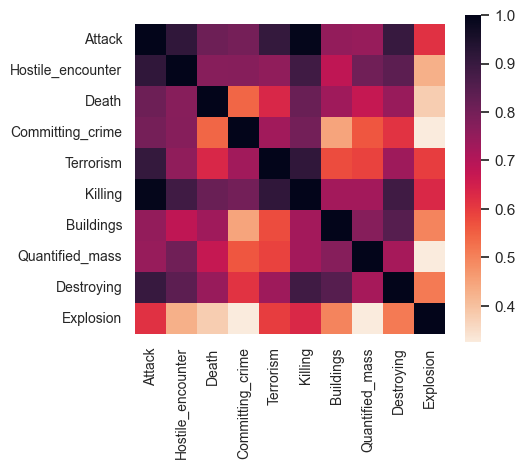

In [ ]:
matrix_dict = defaultdict(lambda: defaultdict(int))

for (item1, item2), count in all_co_occurrences.items():
    matrix_dict[item1][item2] = count
    matrix_dict[item2][item1] = count
   #if item1 == item2:
   #     matrix_dict[item1][item2] = 0

matrix_df = pd.DataFrame(matrix_dict).fillna(0) 
matrix_df.shape

# remove rows and columns with all zeros
matrix_df = matrix_df.loc[:, (matrix_df > 500).any(axis=0)]
# remove columns with  all zeros 
matrix_df = matrix_df.loc[(matrix_df > 500).any(axis=1), :]
print(matrix_df.shape)

# plot matrix_df 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.heatmap(matrix_df.corr(), cmap="rocket_r", annot=False, fmt="g",  square=True, cbar_kws={"shrink": 0.85})
#plt.title("Co-occurrences of FrameNet Frames", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



In [ ]:
# sort tuple containing strings alphabetically
sorted_all_co_occurrences = dict(sorted(all_co_occurrences.items(), key=lambda item: item[1], reverse=True))
sorted_all_co_occurrences

# plot all_co_occurrences



{('Attack', 'Attack'): 22284,
 ('Attack', 'Killing'): 12966,
 ('Attack', 'Hostile_encounter'): 10722,
 ('Hostile_encounter', 'Hostile_encounter'): 9465,
 ('Killing', 'Killing'): 7292,
 ('Buildings', 'Buildings'): 7122,
 ('Attack', 'Buildings'): 6795,
 ('Quantified_mass', 'Quantified_mass'): 5612,
 ('Attack', 'Quantified_mass'): 5298,
 ('Hostile_encounter', 'Killing'): 5088,
 ('Hostile_encounter', 'Quantified_mass'): 3904,
 ('Attack', 'Terrorism'): 3792,
 ('Buildings', 'Killing'): 3236,
 ('Buildings', 'Quantified_mass'): 3214,
 ('Buildings', 'Hostile_encounter'): 3098,
 ('Killing', 'Quantified_mass'): 3014,
 ('Attack', 'Death'): 2217,
 ('Attack', 'Destroying'): 2037,
 ('Terrorism', 'Terrorism'): 1843,
 ('Killing', 'Terrorism'): 1834,
 ('Death', 'Death'): 1617,
 ('Death', 'Killing'): 1568,
 ('Death', 'Hostile_encounter'): 1338,
 ('Buildings', 'Death'): 1236,
 ('Hostile_encounter', 'Terrorism'): 1178,
 ('Buildings', 'Destroying'): 1150,
 ('Destroying', 'Killing'): 1096,
 ('Destroying', 'H

In [ ]:
# compute co_occurrences with frame_net frame for all framenet frames and plot them:
all_co_occurrences = {}
for frame in invisble_effects:
    all_results,co_occurrences = identify_co_occurring_frames_specific(UK_frame_semantics['frame_semantics'], frame, 3)
    for element,value in co_occurrences.items():
        if element in all_co_occurrences.keys():
            all_co_occurrences[element] = all_co_occurrences[element] + value
        else:
            all_co_occurrences[element] = value
print(all_co_occurrences)

# create co-occurrences matrix with all_co_occurrences
co_occurrences_matrix = pd.DataFrame(all_co_occurrences.items(), columns=['frame', 'count'])
co_occurrences_matrix.head()



{('Being_obligated', 'Emotion_directed'): 106, ('Emotion_directed', 'Judgment'): 362, ('Emotion_directed', 'Emotion_directed'): 2827, ('Emotion_directed', 'Feeling'): 470, ('Emotion_directed', 'Perception_experience'): 888, ('Emotion_directed', 'Experiencer_focus'): 732, ('Emotion_directed', 'Kinship'): 2222, ('Emotion_directed', 'Fear'): 240, ('Awareness', 'Emotion_directed'): 954, ('Emotion_directed', 'Relational_political_locales'): 44, ('Change_of_leadership', 'Emotion_directed'): 304, ('Being_at_risk', 'Emotion_directed'): 586, ('Emotion_directed', 'Stimulus_focus'): 238, ('Communication', 'Emotion_directed'): 258, ('Emotion_directed', 'Opinion'): 586, ('Emotion_directed', 'Surviving'): 54, ('Becoming_aware', 'Emotion_directed'): 360, ('Emotion_directed', 'Medical_conditions'): 330, ('Emotion_directed', 'Memory'): 130, ('Coming_to_believe', 'Emotion_directed'): 236, ('Emotion_directed', 'Recovery'): 24, ('Emotion_directed', 'Forgiveness'): 20, ('Emotion_directed', 'Trust'): 22, ('

,frame,count
0,"(Being_obligated, Emotion_directed)",106
1,"(Emotion_directed, Judgment)",362
2,"(Emotion_directed, Emotion_directed)",2827
3,"(Emotion_directed, Feeling)",470
4,"(Emotion_directed, Perception_experience)",888


(15, 15)


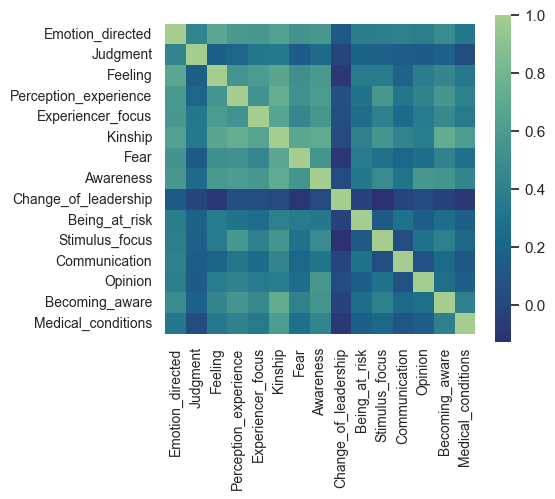

In [ ]:
matrix_dict = defaultdict(lambda: defaultdict(int))

for (item1, item2), count in all_co_occurrences.items():
    matrix_dict[item1][item2] = count
    matrix_dict[item2][item1] = count
   #if item1 == item2:
   #     matrix_dict[item1][item2] = 0

matrix_df = pd.DataFrame(matrix_dict).fillna(0) 
matrix_df.shape

# remove rows and columns with all zeros
matrix_df = matrix_df.loc[:, (matrix_df > 500).any(axis=0)]
# remove columns with  all zeros 
matrix_df = matrix_df.loc[(matrix_df > 500).any(axis=1), :]
print(matrix_df.shape)

# plot matrix_df 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.heatmap(matrix_df.corr(), cmap="crest_r", annot=False, fmt="g",  square=True, cbar_kws={"shrink": 0.85})
#plt.title("Co-occurrences of FrameNet Frames", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()



In [ ]:
# find most common frame in a dcoument in the frame_semantic_transformer results
def find_most_common_frame(frame_semantics):
    most_common_frame = {}
    for document_frames in frame_semantics['frame_semantics']: 
        for sentence_frames in document_frames:
            for frame in sentence_frames.frames:
                if frame.name in most_common_frame:
                    most_common_frame[frame.name] += 1
                else:
                    most_common_frame[frame.name] = 1
    return most_common_frame
most_common_frame = find_most_common_frame(UK_frame_semantics)

# sort the most common frame
sorted_most_common_frame = dict(sorted(most_common_frame.items(), key=lambda item: item[1], reverse=True))
sorted_most_common_frame

{'Statement': 20505,
 'Leadership': 9137,
 'Calendric_unit': 6869,
 'People': 6078,
 'Political_locales': 6065,
 'Hostile_encounter': 4597,
 'Attack': 4374,
 'Kinship': 4067,
 'Aggregate': 3745,
 'Increment': 3423,
 'Killing': 3338,
 'Intentionally_act': 3260,
 'Arriving': 3232,
 'Quantified_mass': 3192,
 'Relative_time': 2938,
 'Causation': 2840,
 'Buildings': 2838,
 'Request': 2551,
 'Existence': 2545,
 'Time_vector': 2483,
 'Telling': 2166,
 'Judgment_communication': 2160,
 'Measure_duration': 2136,
 'Text': 2114,
 'Interior_profile_relation': 2076,
 'Temporal_collocation': 2010,
 'Awareness': 1969,
 'Desiring': 1957,
 'Emotion_directed': 1931,
 'Cardinal_numbers': 1931,
 'Discussion': 1919,
 'Assistance': 1818,
 'Military': 1806,
 'Inclusion': 1775,
 'Attributed_information': 1758,
 'Event': 1745,
 'Locale_by_use': 1723,
 'Taking_sides': 1699,
 'Capability': 1673,
 'Age': 1673,
 'Locale': 1670,
 'Perception_experience': 1658,
 'Self_motion': 1637,
 'Attempt': 1594,
 'Using': 1527,


In [ ]:
print(UK.shape)

(8150, 10)


### Be careful with mapping indices, some might be missing

In [ ]:
subset_UK_df = UK.iloc[:2001]
subset_UK_df.shape


(2001, 10)

In [ ]:
# extract document wise frames: 
def extract_document_frames(frame_semantics):
    all_results = []
    for document_frames in frame_semantics['frame_semantics']: 
        doc_frames = {}
        for sentence_frames in document_frames:
            for frame in sentence_frames.frames:
                if frame.name.lower() in doc_frames:
                    doc_frames[frame.name.lower()] += 1
                else:
                    doc_frames[frame.name.lower()] = 1
        all_results.append(doc_frames)
    return all_results

In [418]:
doc_frames = extract_document_frames(UK_frame_semantics)
print(len(doc_frames))

2001


In [416]:
# add doc_frames to UK dataframe subset 
subset_UK_df['doc_frames'] = doc_frames 

In [417]:
frames_df = pd.json_normalize(subset_UK_df['doc_frames'])


In [ ]:
susbet_frames = [frame for frame in frames_df.columns if frame in framenet_frames]

In [ ]:
frames_df = frames_df[susbet_frames]

In [ ]:
subset_UK_df.columns

Index(['description', 'maintext', 'source_domain', 'title', 'url', 'language',
       'date_publish', 'region', 'title_len', 'text_len', 'doc_frames'],
      dtype='object')

In [ ]:
frames_df = pd.concat([subset_UK_df[['date_publish']], frames_df], axis=1)

In [ ]:
# Convert 'date_published' to datetime if it's not already
frames_df['date_publish'] = pd.to_datetime(frames_df['date_publish'])



In [ ]:
filtered_df = frames_df[frames_df['date_publish'].dt.year.isin([2023,2024])]

# Group by 'date_published' and sum the counts for each frame
aggregated_df = filtered_df.groupby('date_publish').sum()
aggregated_df.head()

,hostile_encounter,quantified_mass,death,buildings,attack,besieging,destroying,committing_crime,terrorism,killing,military_operation,firing,explosion,surrendering,violence,rebellion,subversion,counterattack,arson
date_publish,,,,,,,,,,,,,,,,,,,
2023-11-01 00:00:00,16.0,9.0,1.0,0.0,5.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-11-01 03:34:31,3.0,3.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-11-01 04:37:28,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-11-01 04:38:05,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-11-01 05:23:32,9.0,6.0,0.0,2.0,13.0,0.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 800x1600 with 0 Axes>

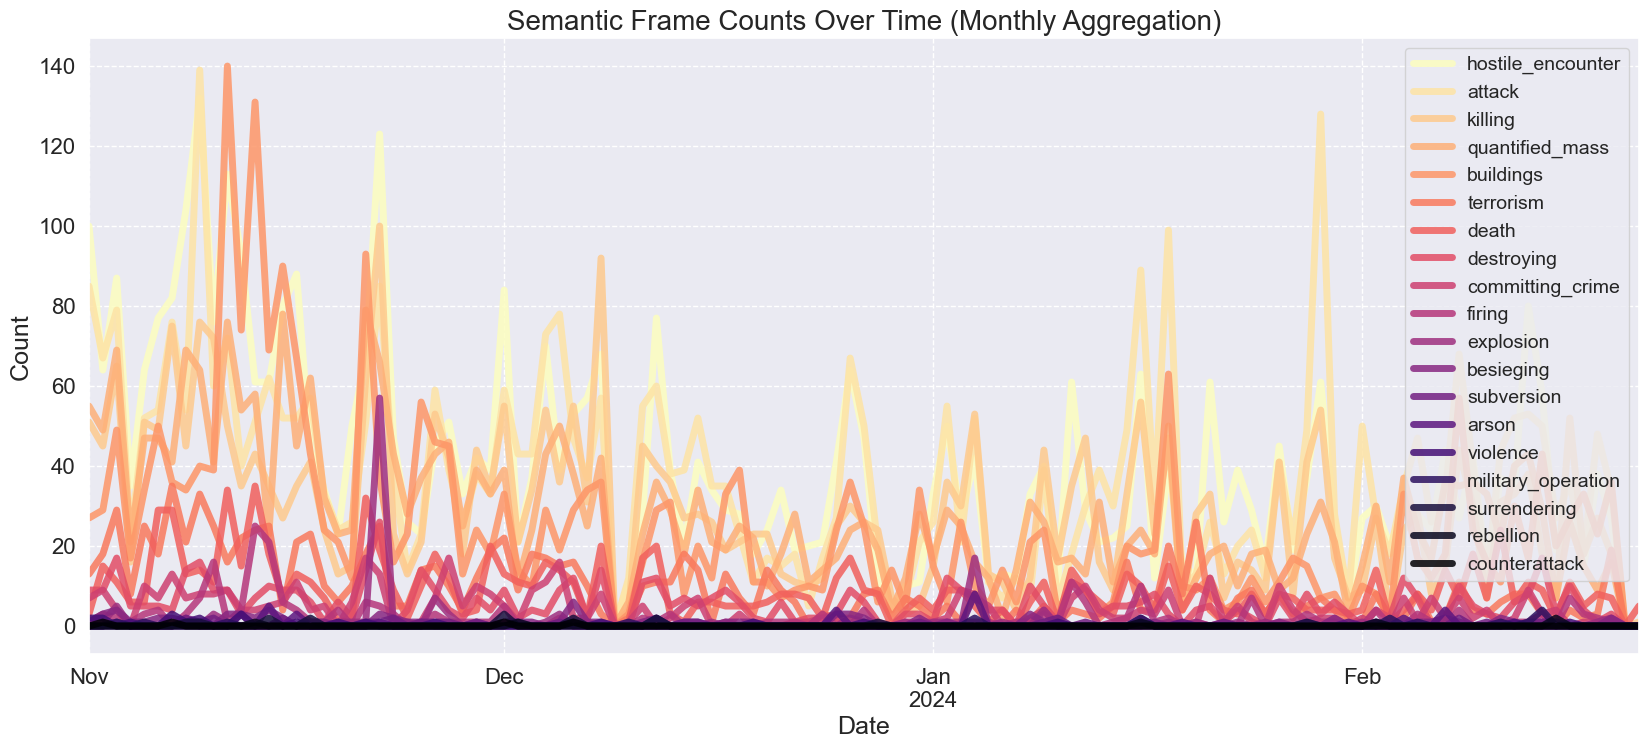

In [413]:
top_frames = aggregated_df.sum().sort_values(ascending=False).head(20).index
aggregated_df_monthly = aggregated_df.resample('D').sum()
# make prettier by making a transparent stacked area plot 
plt.figure(figsize=(8, 16))
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
#sns.lineplot(data=aggregated_df_monthly[top_frames],palette="tab10", linewidth=2.5, alpha=0.7)
aggregated_df_monthly[top_frames].plot(kind='line', figsize=(20, 8), alpha=0.85, colormap="magma_r", linewidth=5)
plt.title("Semantic Frame Counts Over Time (Monthly Aggregation)", fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14, loc='upper right')
plt.grid(axis='both', linestyle='--', linewidth=1)
plt.show()

<Figure size 800x1600 with 0 Axes>

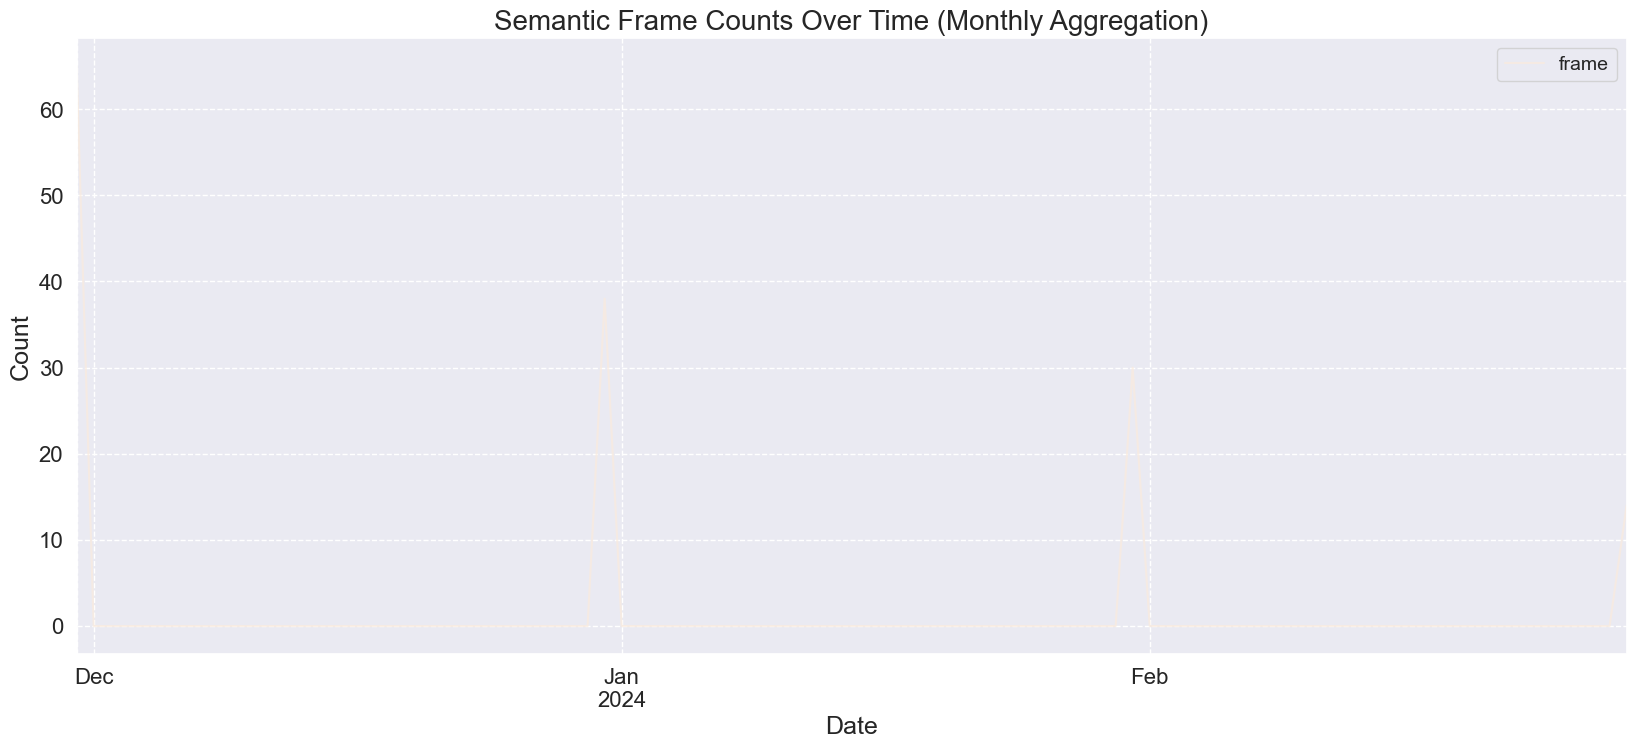

In [363]:
top_frames = aggregated_df.sum().sort_values(ascending=False).head(20).index
aggregated_df_monthly = aggregated_df.resample('D').sum()
# make prettier by making a transparent stacked area plot 
plt.figure(figsize=(8, 16))
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
#sns.lineplot(data=aggregated_df_monthly[top_frames],palette="tab10", linewidth=2.5, alpha=0.7)
aggregated_df_monthly[top_frames].plot(kind='line', figsize=(20, 8), alpha=0.7, colormap="rocket_r")
plt.title("Semantic Frame Counts Over Time (Monthly Aggregation)", fontsize=20)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14, loc='upper right')
plt.grid(axis='both', linestyle='--', linewidth=1)
plt.show()

In [419]:
frames_df = pd.json_normalize(subset_UK_df['doc_frames'])
susbet_frames = [frame for frame in frames_df.columns if frame in invisble_effects]
frames_df = frames_df[susbet_frames]
frames_df = pd.concat([subset_UK_df[['date_publish']], frames_df], axis=1)
# Convert 'date_published' to datetime if it's not already
frames_df['date_publish'] = pd.to_datetime(frames_df['date_publish'])
filtered_df = frames_df[frames_df['date_publish'].dt.year.isin([2023,2024])]
filtered_df = frames_df[frames_df['date_publish'].dt.month.isin([11,12,1,2,3])]

# Group by 'date_published' and sum the counts for each frame
aggregated_df = filtered_df.groupby('date_publish').sum()

# Group by 'date_published' week and sum the counts for each frame
aggregated_weekly_df = filtered_df.resample('W', on='date_publish').sum()

# Group by 'date_published' daily and sum the counts for each frame
aggregated_daily_df = filtered_df.resample('D', on='date_publish').sum()
top_frames = aggregated_daily_df.sum().sort_values(ascending=False).head(20).index

<Figure size 800x1600 with 0 Axes>

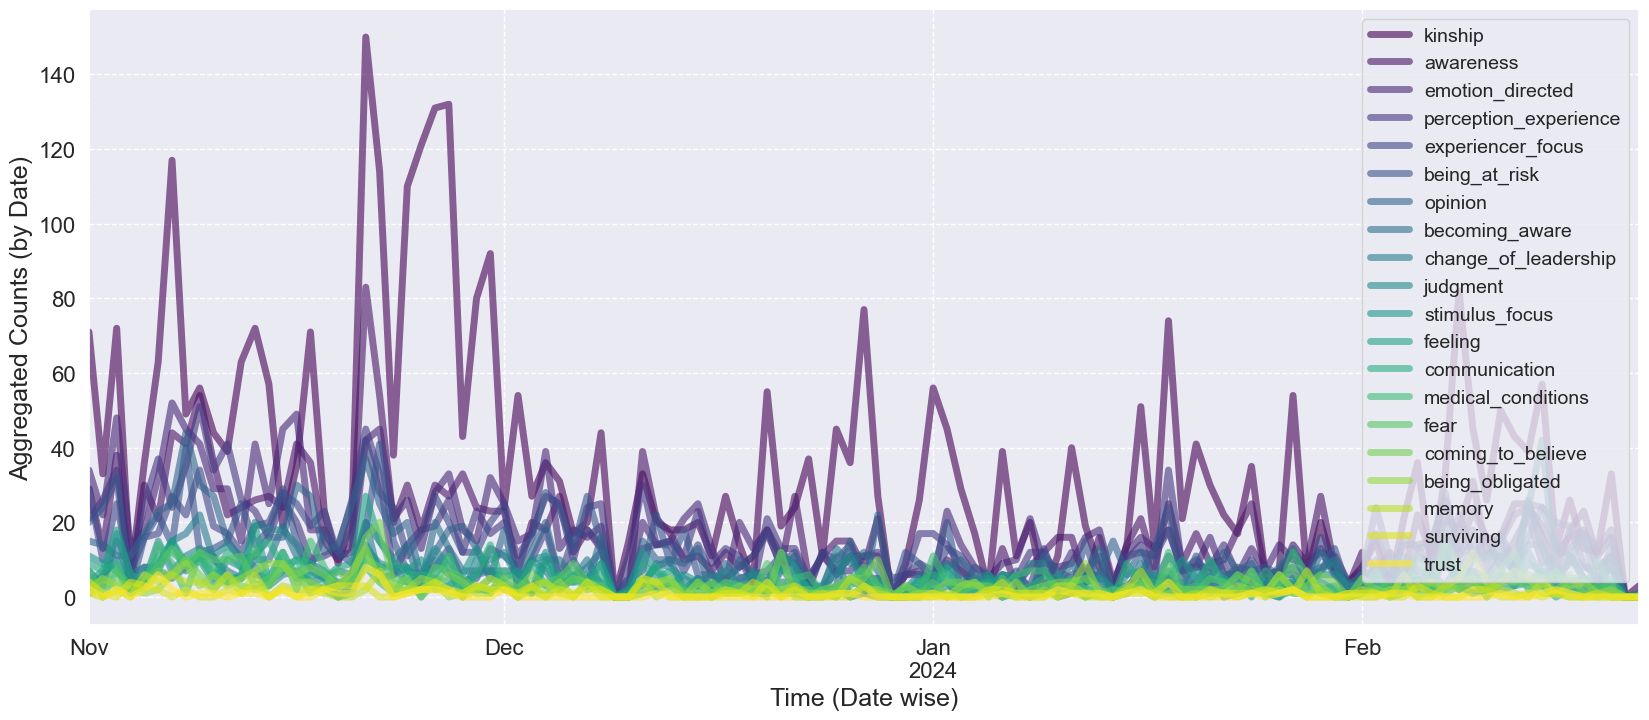

In [425]:

# make prettier by making a transparent stacked area plot 
plt.figure(figsize=(8, 16))
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
#sns.lineplot(data=aggregated_df_monthly[top_frames],palette="tab10", linewidth=2.5, alpha=0.7)
aggregated_daily_df[top_frames].plot(kind='line', figsize=(20, 8), alpha=0.6, colormap="viridis", linewidth=5)
#plt.title("Semantic Frame Counts Over Time (Monthly Aggregation)", fontsize=20)
plt.xlabel("Time (Date wise)", fontsize=18)
plt.ylabel("Aggregated Counts (by Date)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14, loc='upper right')
plt.grid(axis='both', linestyle='--', linewidth=1)
plt.show()

# MFC

In [ ]:
frame_annotated_data_df = pd.read_csv('../../data/processed/frame_annotated_data.csv')
frame_annotated_data_df = frame_annotated_data_df.drop(columns=['Unnamed: 0'])
frame_annotated_data_df["date_publish"] = pd.to_datetime(frame_annotated_data_df["date_publish"])

In [ ]:
frame_annotated_data_df.shape

(1811, 12)

In [ ]:
# combine frame_annotated_data_df with subset_UK dataframe based on the column "title" 
merged_df = pd.merge(subset_UK_df, frame_annotated_data_df, on='title', how='inner')
merged_df.columns


Index(['description_x', 'maintext_x', 'source_domain_x', 'title', 'url_x',
       'language_x', 'date_publish_x', 'region_x', 'title_len_x', 'text_len_x',
       'doc_frames', 'description_y', 'maintext_y', 'source_domain_y', 'url_y',
       'language_y', 'date_publish_y', 'region_y', 'title_len_y', 'text_len_y',
       'frame', 'reasoning'],
      dtype='object')

In [ ]:
merged_df["date_publish_x"] = pd.to_datetime(merged_df["date_publish_x"])
merged_df = merged_df[merged_df['date_publish_x'].dt.year.isin([2023,2024])]
merged_df = merged_df[["frame", "date_publish_x"]]

# Exploding the 'frames' column into separate rows for each frame
merged_df = merged_df.explode('frame')
merged_df.head()
merged_df.set_index('date_publish_x', inplace=True)

# filter merged_df to remove "ERROR" frame
merged_df = merged_df[merged_df["frame"] != "ERROR"]

In [360]:
monthly_frame_counts = merged_df.groupby([pd.Grouper(freq='D'), 'frame']).size().unstack(fill_value=0)

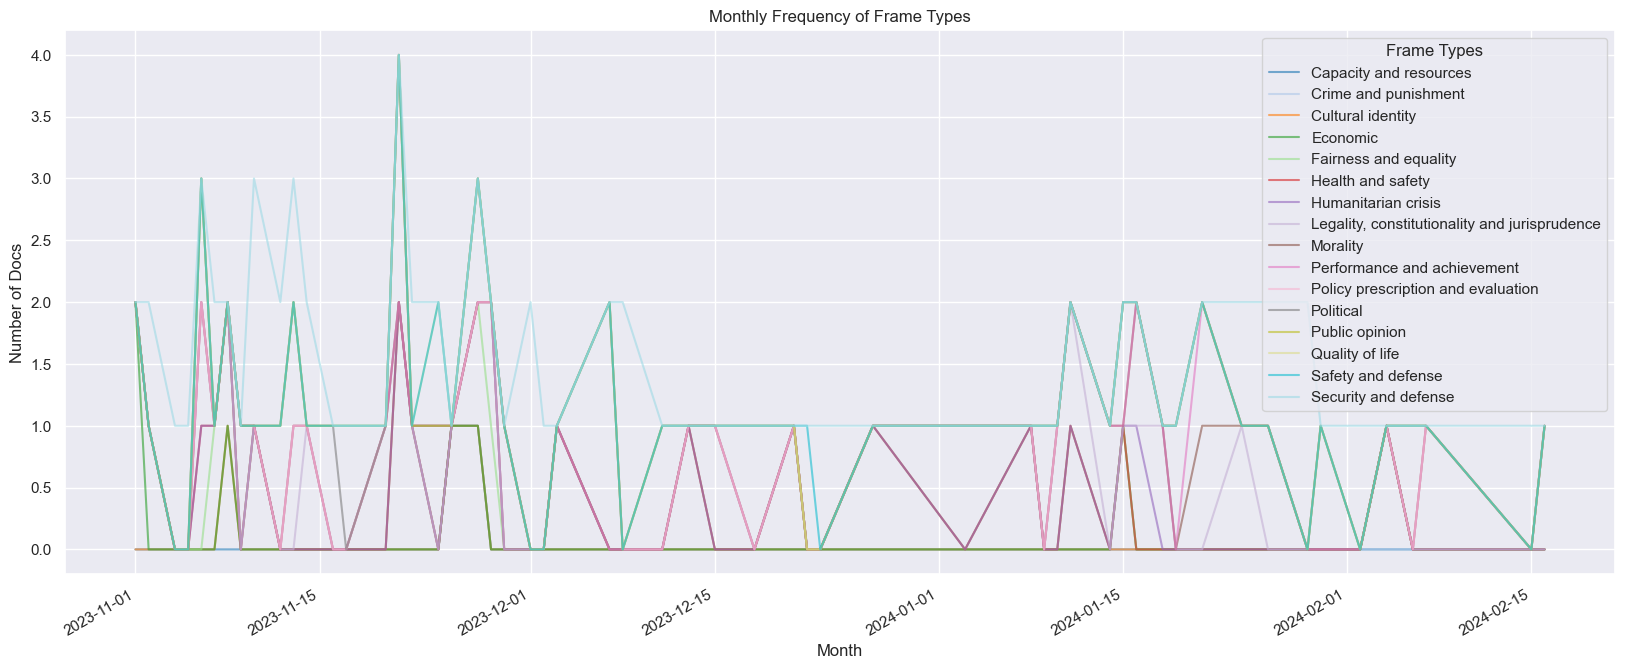

In [361]:
import matplotlib.pyplot as plt

# Plotting a stacked area chart
monthly_frame_counts.plot(kind='line', stacked=True, figsize=(20, 8), alpha=0.6, colormap='tab20') #tab20
plt.title('Monthly Frequency of Frame Types')
plt.xlabel('Month')
plt.ylabel('Number of Docs')
plt.legend(title='Frame Types', loc='upper right')
plt.show()

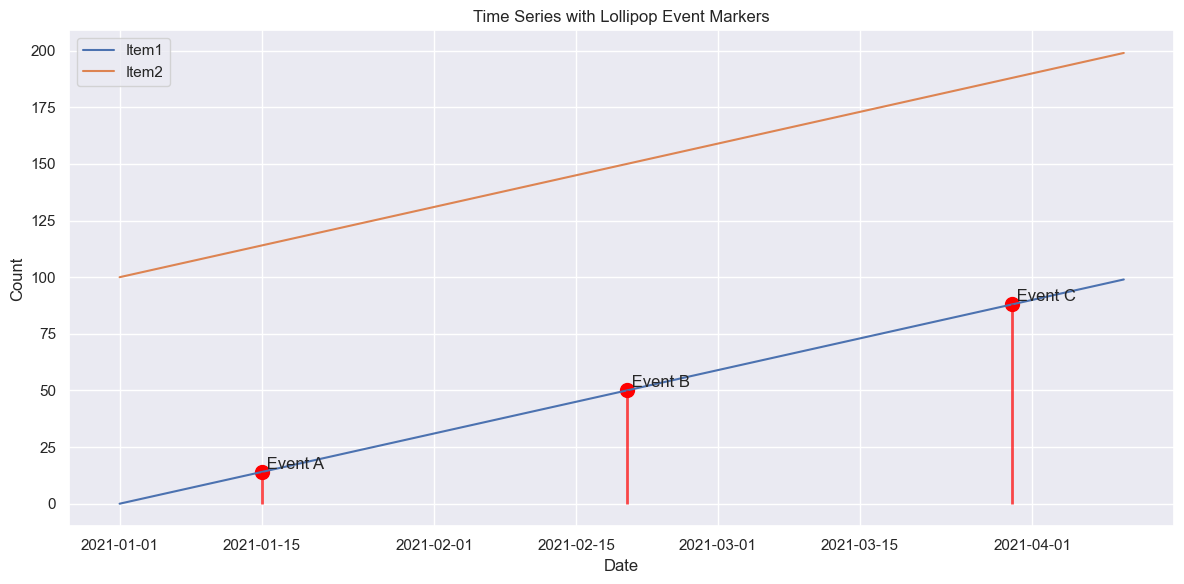

In [249]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame
dates = pd.date_range(start='2021-01-01', periods=100)
data = {'Item1': range(100), 'Item2': range(100, 200)}
df = pd.DataFrame(data, index=dates)

# Plotting the time series
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.legend()

# Events
events = {
    '2021-01-15': 'Event A',
    '2021-02-20': 'Event B',
    '2021-03-30': 'Event C'
}

# Adding lollipop markers
for date, event in events.items():
    event_date = pd.to_datetime(date)
    event_value = df.at[event_date, 'Item1']
    plt.vlines(x=event_date, ymin=0, ymax=event_value, color='red', alpha=0.7, linewidth=2)
    plt.scatter(event_date, event_value, color='red', s=100)
    plt.text(event_date, event_value, f' {event}', verticalalignment='bottom')

# Final adjustments
plt.title('Time Series with Lollipop Event Markers')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

In [300]:
frame_annotated_data_df = pd.read_csv('../../data/processed/frame_annotated_data.csv')
frame_annotated_data_df = frame_annotated_data_df.drop(columns=['Unnamed: 0'])
frame_annotated_data_df["date_publish"] = pd.to_datetime(frame_annotated_data_df["date_publish"])
# drop the ones which have "ERROR" in the frame column
frame_annotated_data_df = frame_annotated_data_df[frame_annotated_data_df["frame"] != "ERROR"]


In [315]:
frame_annotated_data_df["region"].value_counts()

region
US    454
UK    370
ME    367
Name: count, dtype: int64

In [335]:
# select UK data from frame_annotated_data_df

UK_frame_annotated_data = frame_annotated_data_df[frame_annotated_data_df["region"] == "UK"]
print(UK_frame_annotated_data.shape)

US_frame_annotated_data = frame_annotated_data_df[frame_annotated_data_df["region"] == "US"]
print(US_frame_annotated_data.shape)

ME_frame_annotated_data = frame_annotated_data_df[frame_annotated_data_df["region"] == "ME"]
print(ME_frame_annotated_data.shape)

(370, 12)
(454, 12)
(367, 12)


In [354]:
# counts of frames in UK_frame_annotated_data
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Moralty", "Morality")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Political", "Politics")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Election and politics", "Politics")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Safety and defence", "Security and defense")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Hostages and prisoners", "Security and defense")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Fight and athletes statistics: record, age, height, reach, and stance of fighters", "Other")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Population and Migration", "Politics")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Humanitarian crisis", "Politics")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Humanitarian crisis and survival", "Politics")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Entertainment and Culture", "Cultural identity")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Welfare and human services", "Politics")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Historical Analysis and Debate", "Cultural identity")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Performance and achievement", "Cultural identity")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("History and Archeology", "Cultural identity")
UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Policy prescription and evaluation, Security and defense", "Policy prescription and evaluation")


frame_counts = UK_frame_annotated_data["frame"].value_counts().to_dict()
counts_df = pd.DataFrame(list(frame_counts.items()), columns=['frame', 'count'])
counts_df.head()

# reverse sort counts df
counts_df = counts_df.sort_values(by='count', ascending=True)
counts_df.value_counts()

# collapse "Population and Migration" and "Humanitarian crisis", "Humanitarian crisis and survival", into "Political"






/var/folders/66/7zn69qrn4cg38jdkg3kkzj_m0000gr/T/ipykernel_10560/1693683655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Moralty", "Morality")
/var/folders/66/7zn69qrn4cg38jdkg3kkzj_m0000gr/T/ipykernel_10560/1693683655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UK_frame_annotated_data["frame"] = UK_frame_annotated_data["frame"].replace("Political", "Politics")
/var/folders/66/7zn69qrn4cg38jdkg3kkzj_m0000gr/T/ipykern

frame                                          count
Capacity and resources                         7        1
Crime and punishment                           14       1
Cultural identity                              8        1
Economic                                       7        1
Fairness and equality                          68       1
Health and safety                              13       1
History and Archaeology                        1        1
Legality, constitutionality and jurisprudence  35       1
Morality                                       33       1
Other                                          1        1
Policy prescription and evaluation             44       1
Politics                                       48       1
Public opinion                                 2        1
Quality of life                                8        1
Safety and defense                             2        1
Security and defense                           79       1
Name: count, dtype:

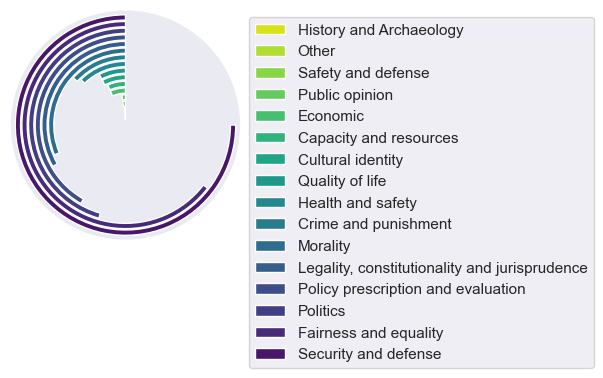

In [362]:

import math
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

pal_vi = get_color('viridis_r', len(counts_df))
pal_plas = get_color('plasma_r', len(counts_df))
pal_spec = get_color('Spectral', len(counts_df))
pal_hsv = get_color('hsv', len(counts_df))

plt.gcf().set_size_inches(3,3)
sns.set_style('darkgrid')

#set max value
max_val = max(counts_df['count'])
ax = plt.subplot(projection='polar')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
ax.set_rgrids([])

#set the projection
ax = plt.subplot(projection='polar')

for i in range(len(counts_df)):
    ax.barh(i, list(counts_df['count'])[i]*1.5*np.pi/max_val,
            label=list(counts_df['frame'])[i], color=pal_vi[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [323]:
# counts of frames in UK_frame_annotated_data
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("External regulation and reputation", "Policy prescription and evaluation")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Political", "Politics")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Human error and mishap", "Politics")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Freedom of Speech and Expression", "Politics")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Hostages and prisoners", "Security and defense")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Humanitarian Aid and Fairness and Equality", "Fairness and Equality")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Freedom of Speech", "Politics")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Morality and Cultural Identity", "Morality")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Morality, Fairness and Equality", "Morality")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Cultural identity and Community", "Cultural identity")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Morality, Fairness and equality", "Morality")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Historical Analysis and Debate", "Cultural identity")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Economy: inflation and consumer prices	", "Economy")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("History and background", "Cultural identity")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Morality, fairness and equality", "Morality")
US_frame_annotated_data["frame"] = US_frame_annotated_data["frame"].replace("Morality, fairness and equality", "Morality")


frame_counts = US_frame_annotated_data["frame"].value_counts().to_dict()
counts_df = pd.DataFrame(list(frame_counts.items()), columns=['frame', 'count'])
counts_df.head()

# reverse sort counts df
counts_df = counts_df.sort_values(by='count', ascending=False)
counts_df

,frame,count
0,Security and defense,96
1,Fairness and equality,84
2,Political,73
3,Policy prescription and evaluation,48
4,"Legality, constitutionality and jurisprudence",40
5,Morality,29
6,Crime and punishment,12
7,Cultural identity,10
8,Quality of life,10
9,Economic,8


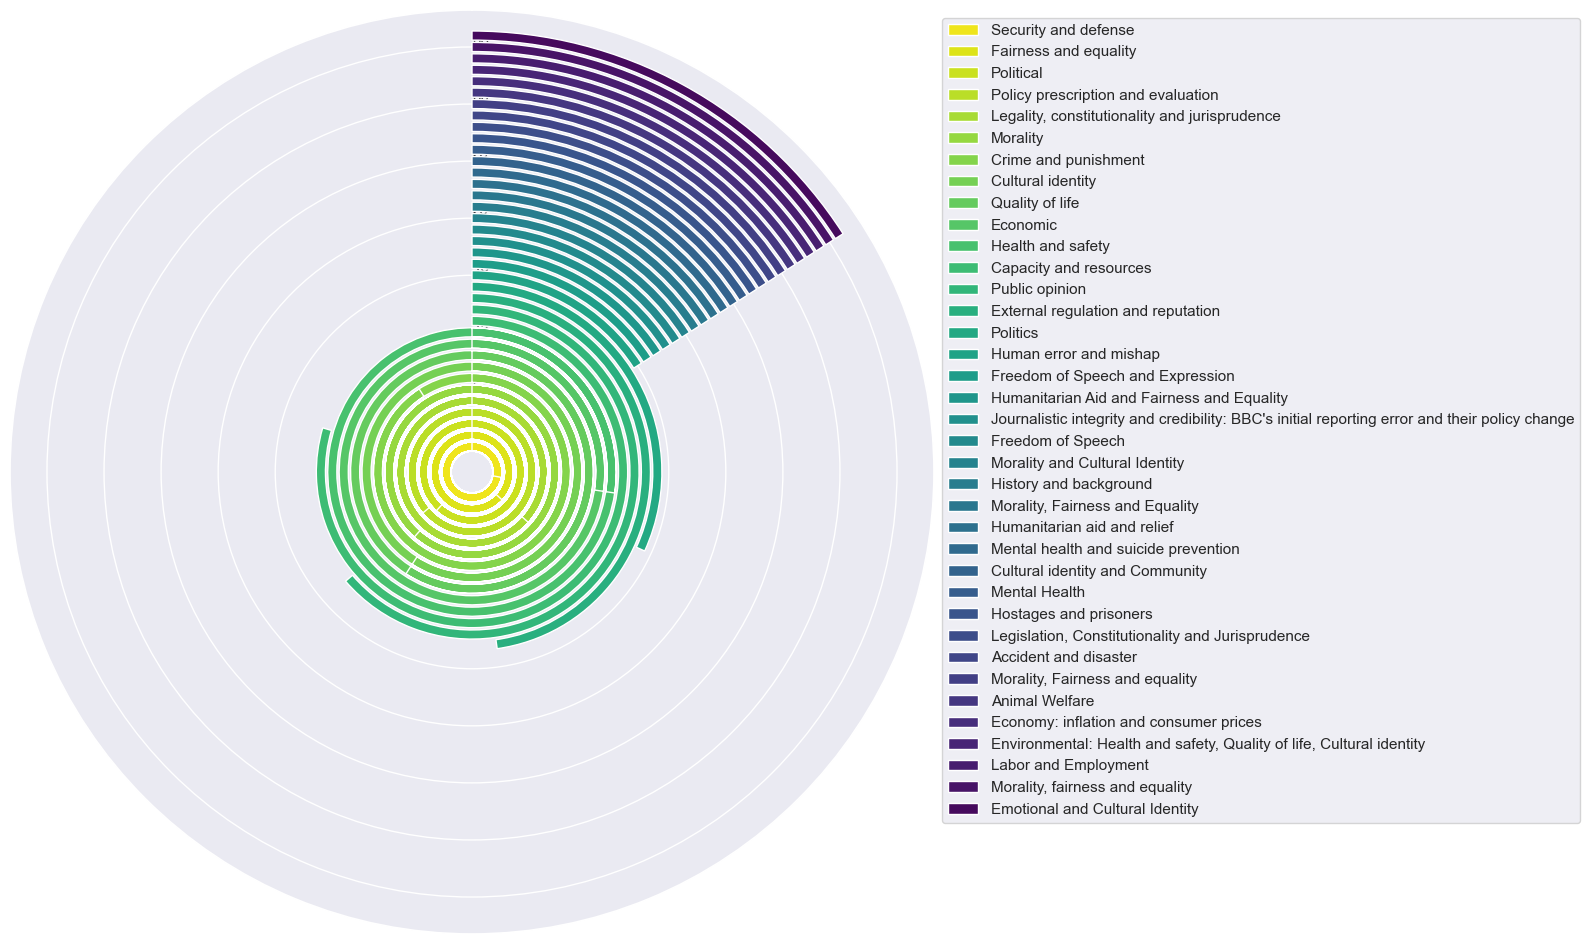

In [325]:

import math
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

def get_color(name, number):
    pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
    return pal

pal_vi = get_color('viridis_r', len(counts_df))
pal_plas = get_color('plasma_r', len(counts_df))
pal_spec = get_color('Spectral', len(counts_df))
pal_hsv = get_color('hsv', len(counts_df))

plt.gcf().set_size_inches(12, 12)
sns.set_style('darkgrid')

#set max value
max_val = max(counts_df['count'])
ax = plt.subplot(projection='polar')

#set the subplot 
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
ax.set_thetagrids([], labels=[])
#ax.set_rgrids(range(len(counts_df)))

#set the projection
ax = plt.subplot(projection='polar')

for i in range(len(counts_df)):
    ax.barh(i, list(counts_df['count'])[i],
            label=list(counts_df['frame'])[i], color=pal_vi[i])

plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()